In [52]:
from sklearn.datasets import make_regression
import numpy as np

In [53]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

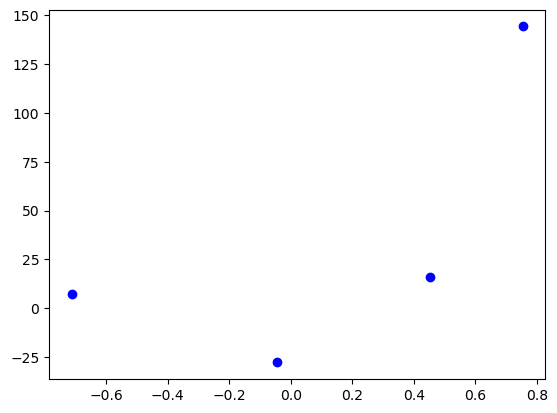

In [54]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color='blue')
plt.show()

In [55]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [56]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [57]:
reg.coef_

array([78.35063668])

In [58]:
reg.intercept_

np.float64(26.15963284313262)

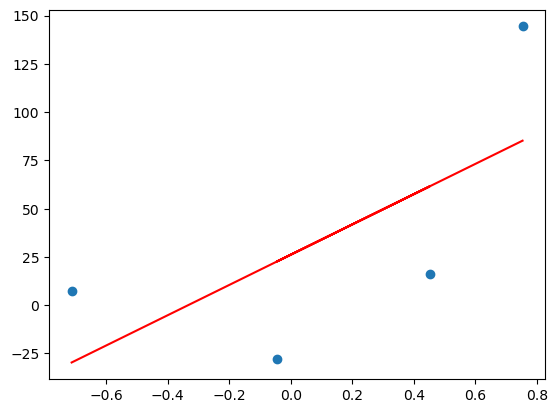

In [59]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X),color='red')
plt.show()

In [60]:
y_pred = ((78.35 * X) +0).reshape(4)

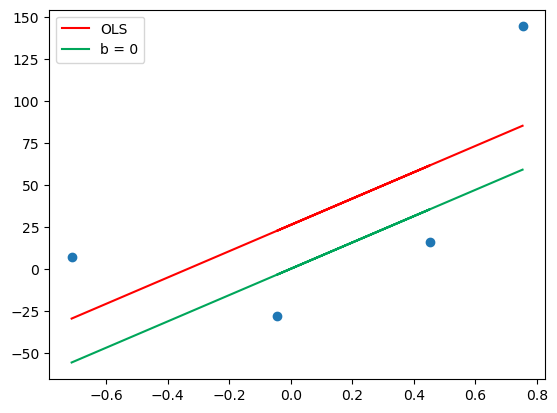

In [61]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred, color='#00a65a', label='b = 0')
plt.legend()
plt.show()

In [63]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [64]:
lr = 0.1
step_size = loss_slope * lr
step_size

np.float64(59.072236591790784)

In [65]:
b = b - step_size

In [66]:
b

np.float64(40.927763408209216)

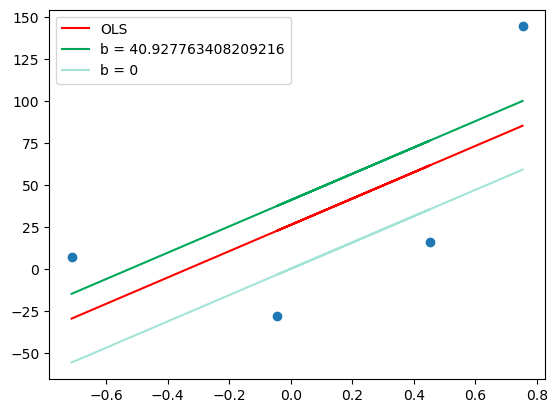

In [67]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [68]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(118.14447318358157)

In [69]:
step_size = loss_slope*lr
step_size
     

np.float64(11.814447318358157)

In [70]:
b = b - step_size
b

np.float64(29.11331608985106)

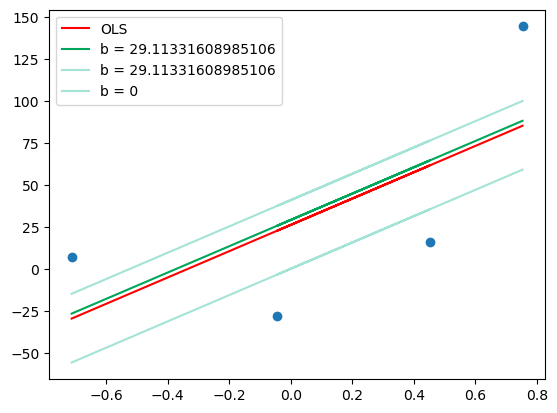

In [71]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [72]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(23.62889463671634)

In [73]:
step_size = loss_slope*lr
step_size

np.float64(2.362889463671634)

In [74]:
b = b - step_size
b

np.float64(26.750426626179426)

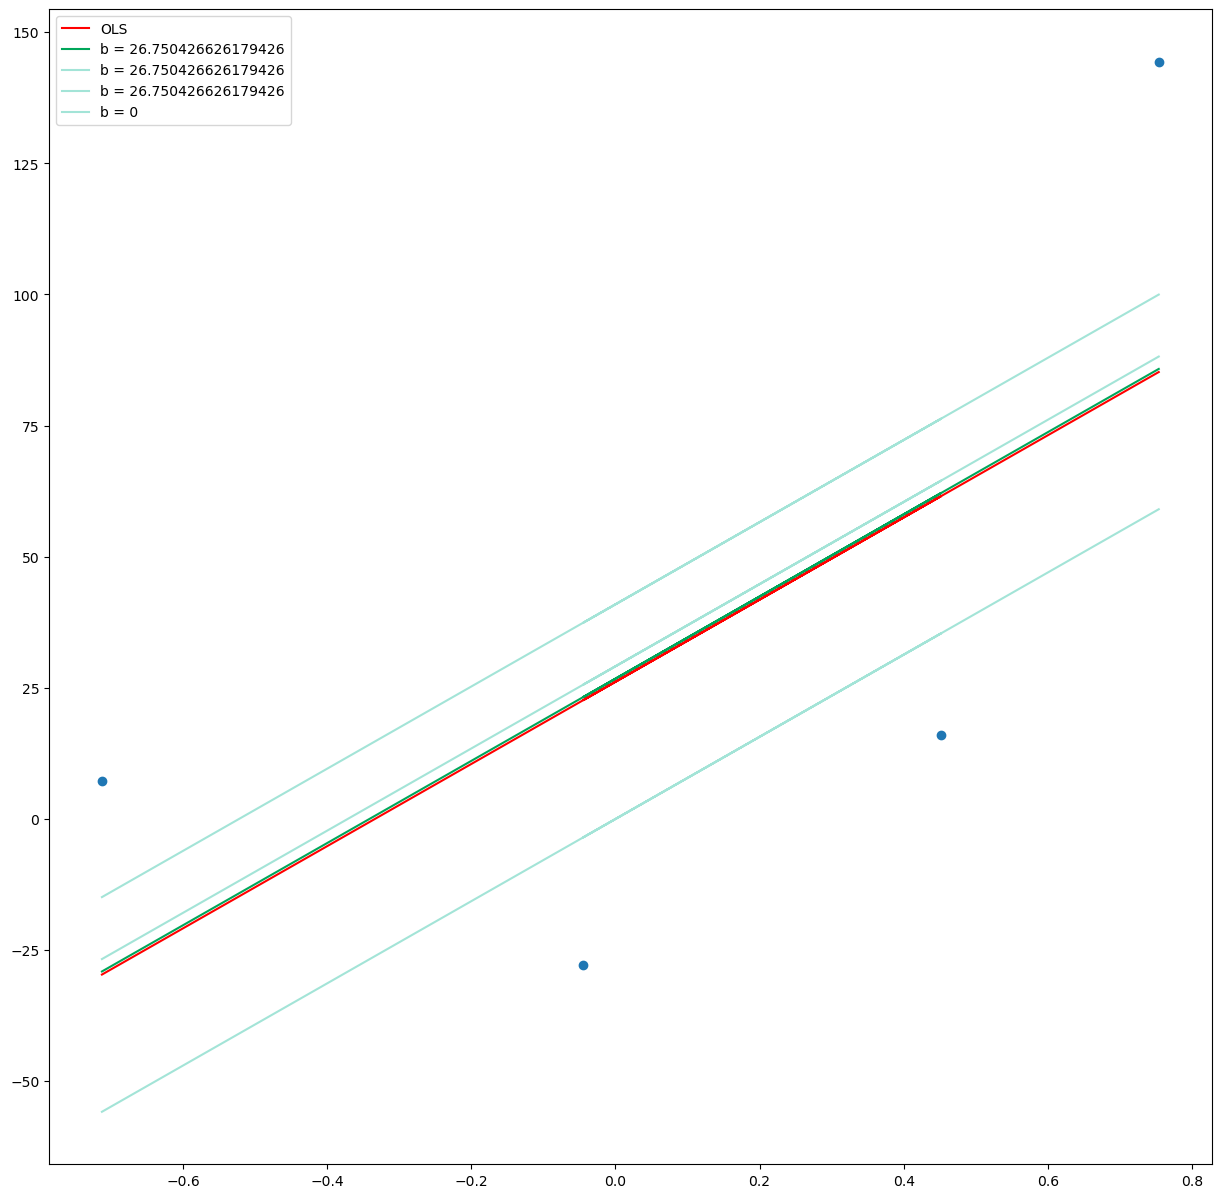

In [75]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

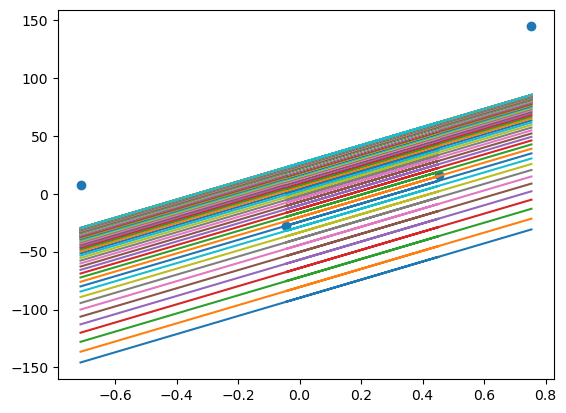

In [76]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

### from class 

In [107]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [108]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

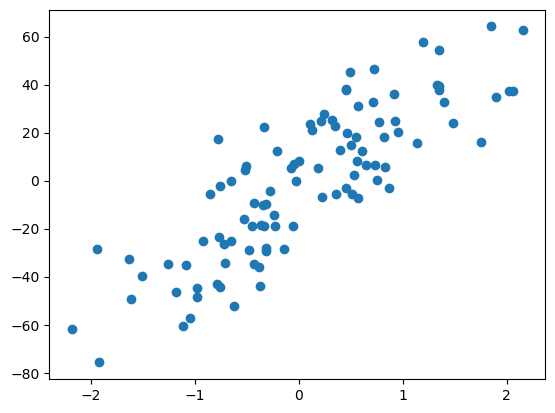

In [109]:
plt.scatter(X,y)

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [114]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [118]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 26.15
        self.b = -120

    def fit(self,X_train, y_train):
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y_train - self.m*X_train.ravel() - self.b)
            self.b = self.b - (self.learning_rate * loss_slope)

        print(self.b)

    def predict(self,X):
        return self.m * X + self.b

In [133]:
gd = GDRegressor(0.01,500)

In [134]:
gd.fit(X_train,y_train)

-2.170937768826525


In [135]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6395733620449036

#### Both m and b 

In [148]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [149]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

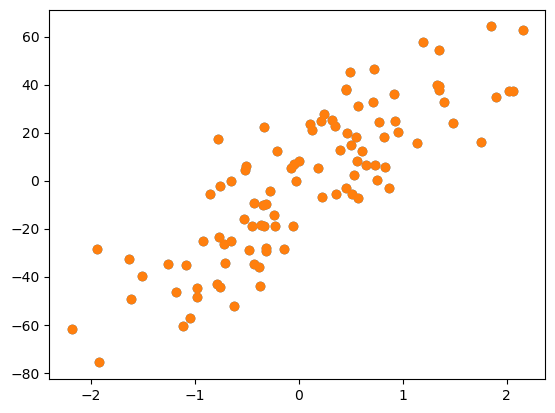

In [152]:
plt.scatter(X,y)
plt.show()

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
lr = LinearRegression()

In [156]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [157]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [166]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [167]:
gd = GDRegressor(0.001,50)

In [168]:
gd.fit(X_train,y_train)

28.11750206751203 -2.2676402151821566


In [170]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345515032740333

In [171]:
import numpy as np

class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 0.0
        self.b = 0.0
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        X = np.array(X).ravel()
        y = np.array(y).ravel()
        n = len(y)

        # calculate b and m using GD
        for i in range(self.epochs):
            error = y - (self.m * X + self.b)
            
            loss_slope_b = -(2/n) * np.sum(error)          # mean taken
            loss_slope_m = -(2/n) * np.sum(error * X)      # mean taken
            
            self.b -= self.lr * loss_slope_b
            self.m -= self.lr * loss_slope_m

        print(self.m, self.b)   # optional: print params after training
        
    def predict(self, X):
        X = np.array(X).ravel()
        return self.m * X + self.b


In [205]:
gd = GDRegressor(0.9,50)

In [206]:
gd.fit(X_train,y_train)

28.123177846478164 -2.2755713184699244


In [207]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345316304817925